<a id="top"></a> 
# OpenSlide
[OpenSlide api](https://openslide.org/api/python/) <br>
[openslide github](https://github.com/openslide/openslide-python) <br>
[openslide dot org](https://openslide.org/) <br>
[install openslide by platform](https://openslide.org/download/) <br>

## Basic usage of *openslide*
[View and OpenSlide object](#view_object) <br>
[Explore ImageSlide & DeepZoomGenerator](#explore_image_slide) <br>
[Mask with skimage filters](#threshold_otsu_mask) <br>
[Compare histogram with thumbnail historgram](#histograms) <br>
[Help for openslide image type (PIL)](#pil_help) <br>
****
### Install on Mac OSX:
```bash
# may require creation of this directory
# sudo mkdir /usr/loca/Frameworks
brew install openslide
pip3 install openslide-python
# or maybe
# pip install openslide-python
```
****
### How to download an example file:
```python
data_download = 'http://openslide.cs.cmu.edu/download/openslide-testdata/'
file_to_download = data_download + 'Aperio/CMU-1-Small-Region.svs'

target_dir = ../data/Aperio
destination_file_name = os.path.join(target_dir, 'CMU-1-Small-Region.svs')
# destination_file_name = '../data/Aperio/CMU-1-Small-Region.svs'
print(file_to_download)

if os.path.isdir(target_dir) == False:
    os.makedirs(target_dir)
    
tuple_of_stuff = urllib.request.urlretrieve(file_to_download, destination_file_name)
print(tuple_of_stuff)
# the file should now be in the target directory
```
****
## Pillow
[pillow (PIL) docs](https://pillow.readthedocs.io/en/5.1.x/reference/Image.html#the-image-class) <br>
****
#### Import extra libraries, load and view the svs file data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
import time
import pandas as pd
import numpy as np

import skimage
from skimage.filters import threshold_otsu

import openslide
from openslide import deepzoom

import PIL
from PIL.Image import Image

from IPython.display import display

In [2]:
data_dir = '../../DigiPath_MLTK_data/Aperio'
if os.path.isdir(data_dir) == False:
    print('data directory not found:\n',data_dir)
else:
    for f in os.listdir(data_dir):
        print(f)

JP2K-33003-2.svs
JP2K-33003-1.svs
CMU-1-JP2K-33005.svs
CMU-1.svs
CMU-3.svs
CMU-1-Small-Region.svs
CMU-2.svs


<a id="view_object"></a>
## View an OpenSlide object
[Top](#top) <br>

Opening Image file: 
	../../DigiPath_MLTK_data/Aperio/CMU-1.svs

openslide.OpenSlide(test_file_name) is type: <class 'openslide.OpenSlide'>
obj.level_count 3
obj.dimensions (46000, 32914)
obj.level_dimensions ((46000, 32914), (11500, 8228), (2875, 2057))
obj.level_downsamples (1.0, 4.000121536217793, 16.00048614487117)
obj.properties are type <class 'openslide._PropertyMap'>

obj.associated_images <_AssociatedImageMap {'label': <PIL.Image.Image image mode=RGBA size=387x463 at 0x11D759278>, 'macro': <PIL.Image.Image image mode=RGBA size=1280x431 at 0x11D7592E8>, 'thumbnail': <PIL.Image.Image image mode=RGBA size=1024x732 at 0x11D759390>}> <class 'openslide._AssociatedImageMap'>

obj.read_region <PIL.Image.Image image mode=RGBA size=200x200 at 0x11D7590B8>

obj.get_best_level_for_downsample(16.000486) 2

Fillable property names
	PROPERTY_NAME_COMMENT
	PROPERTY_NAME_MPP_X
	PROPERTY_NAME_MPP_Y
	PROPERTY_NAME_OBJECTIVE_POWER
Slide Label


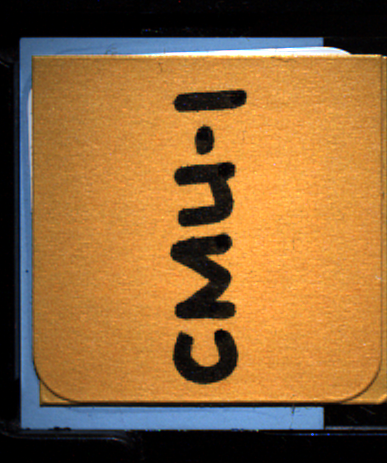

Slide thumbnail


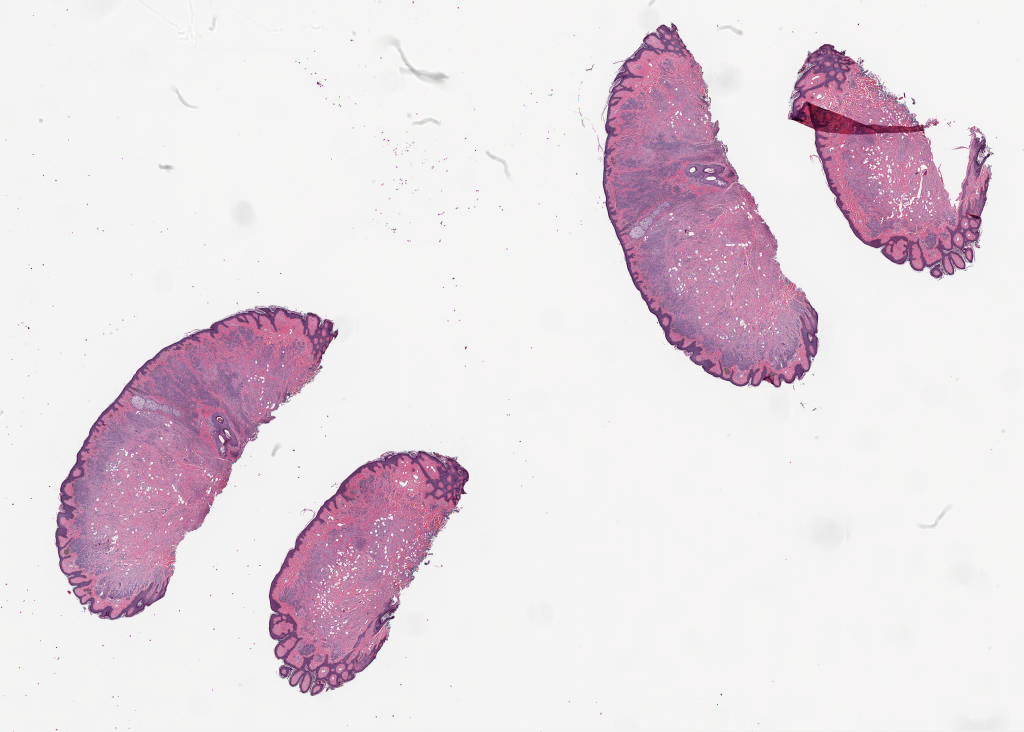

funny_picture did not exist

openslide_obj.close() returns: None
cell run time: 0.908


In [3]:
cell_start_time = time.time()

test_file_name = os.path.join(data_dir, 'CMU-1.svs')
print('Opening Image file: \n\t{}\n'.format(test_file_name))
openslide_obj = openslide.OpenSlide(test_file_name)

print('openslide.OpenSlide(test_file_name) is type:', type(openslide_obj))
print('obj.level_count', openslide_obj.level_count)
print('obj.dimensions', openslide_obj.dimensions)
print('obj.level_dimensions', openslide_obj.level_dimensions)
print('obj.level_downsamples', openslide_obj.level_downsamples)
print('obj.properties are type', type(openslide_obj.properties))

print('\nobj.associated_images', openslide_obj.associated_images, type(openslide_obj.associated_images))

blind_region = openslide_obj.read_region((0, 0), 0, (200,200))
print('\nobj.read_region', openslide_obj.read_region((0, 0), 0, (200,200)))

scldwn = openslide_obj.level_downsamples[-1]
print('\nobj.get_best_level_for_downsample(%0.6f)'%(scldwn), 
      openslide_obj.get_best_level_for_downsample(scldwn))

print('\nFillable property names\n\t{}\n\t{}\n\t{}\n\t{}'.format('PROPERTY_NAME_COMMENT',
                                                                 'PROPERTY_NAME_MPP_X', 
                                                                 'PROPERTY_NAME_MPP_Y', 
                                                                 'PROPERTY_NAME_OBJECTIVE_POWER'))
label = openslide_obj.associated_images['label']
macro = openslide_obj.associated_images['macro']
thumbnail = openslide_obj.associated_images['thumbnail']
print('Slide Label')
display(label)
print('Slide thumbnail')
display(thumbnail)

# see what happens with bad key inputs
try:
    funny_picture = openslide_obj.associated_images['funny_picture']
except:
    print('funny_picture did not exist')
    pass

print('\nopenslide_obj.close() returns:', openslide_obj.close())
print('cell run time: %0.3f'%(time.time() - cell_start_time))

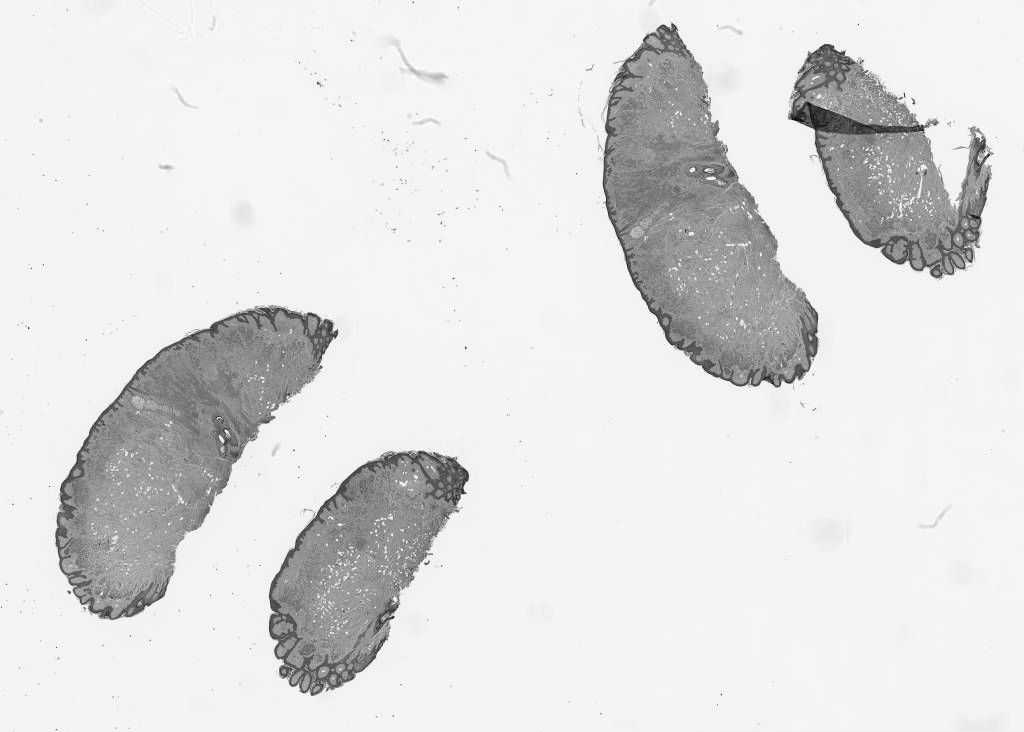

Total time = 0.064133


In [4]:
t_start = time.time()
gry_thmb = thumbnail.convert('L')
display(gry_thmb)

print('Total time = %03f'%(time.time() - t_start))

<a id="histograms"></a>
## Compare Histogram of full-size vs thumbnail images:
[Top](#top) <br>

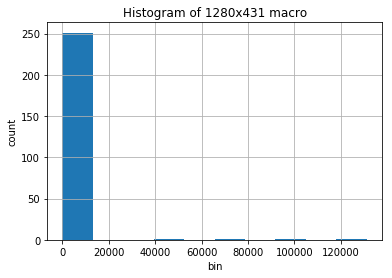

In [5]:
histog = macro.histogram()[0:255]
tpl = plt.hist(histog)
plt.ylabel('count')
plt.xlabel('bin')
plt.title('Histogram of {}x{} macro'.format(macro.size[0], macro.size[1]))
plt.grid(True)
plt.show()

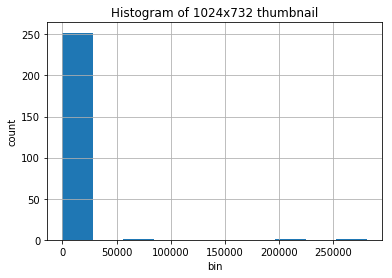

In [6]:
histog = thumbnail.histogram()[0:255]
tpl = plt.hist(histog)
plt.ylabel('count')
plt.xlabel('bin')
plt.title('Histogram of {}x{} thumbnail'.format(thumbnail.size[0], thumbnail.size[1]))
plt.grid(True)
plt.show()

#### view loaded variables and functions with run line magic: %whos

In [7]:
%whos

Variable          Type         Data/Info
----------------------------------------
Image             type         <class 'PIL.Image.Image'>
PIL               module       <module 'PIL' from '/Libr<...>ackages/PIL/__init__.py'>
blind_region      Image        <PIL.Image.Image image mo<...>e=200x200 at 0x11D759470>
cell_start_time   float        1566940653.706903
data_dir          str          ../../DigiPath_MLTK_data/Aperio
deepzoom          module       <module 'openslide.deepzo<...>s/openslide/deepzoom.py'>
display           function     <function display at 0x104caa2f0>
f                 str          CMU-2.svs
gry_thmb          Image        <PIL.Image.Image image mo<...>=1024x732 at 0x10654ABE0>
histog            list         n=255
label             Image        <PIL.Image.Image image mo<...>e=387x463 at 0x11D759198>
macro             Image        <PIL.Image.Image image mo<...>=1280x431 at 0x11D7593C8>
np                module       <module 'numpy' from '/Li<...>kages/numpy/__init__.py

<a id="explore_image_slide"></a>
## Explore ImageSlide and DeepZoomGenerator ?
    Work in progress here:
        need to find more detail on operating the deep zoom generator etc.
[Top](#top) <br>

In [8]:
test2_file_name = os.path.join(data_dir, 'CMU-1-Small-Region.svs')

pil_im = openslide.ImageSlide(test2_file_name)
print(type(pil_im))

<class 'openslide.ImageSlide'>


In [9]:
dzg = deepzoom.DeepZoomGenerator(pil_im, tile_size=254, overlap=1, limit_bounds=True)
type(dzg)

openslide.deepzoom.DeepZoomGenerator

In [10]:
print('dzg.level_count', dzg.level_count)
print('dzg.tile_count', dzg.tile_count)
print('\ndzg.level_tiles', dzg.level_tiles)
print('\ndzg.level_dimensions', dzg.level_dimensions)
print('\ndzg.get_dzi("jpg")', dzg.get_dzi('jpg'))
print('\ndzg.get_dzi("png")', dzg.get_dzi('png'))

dzg.level_count 13
dzg.tile_count 160

dzg.level_tiles ((1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (3, 3), (5, 6), (9, 12))

dzg.level_dimensions ((1, 1), (2, 2), (3, 3), (5, 6), (9, 12), (18, 24), (35, 47), (70, 93), (139, 186), (278, 371), (555, 742), (1110, 1484), (2220, 2967))

dzg.get_dzi("jpg") <Image Format="jpg" Overlap="1" TileSize="254" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Height="2967" Width="2220" /></Image>

dzg.get_dzi("png") <Image Format="png" Overlap="1" TileSize="254" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Height="2967" Width="2220" /></Image>


In [11]:
one_tile = dzg.get_tile(0, (0.0, 0.0))
print(type(one_tile))
#get_tile
#get_tile_coordinates # one_tile = dzg.get_tile_coordinates(0, (0.0, 0.0))
#get_tile_dimensions
# one_tile
# Image.show(one_tile)
type(one_tile)

<class 'PIL.Image.Image'>


PIL.Image.Image

In [12]:
one_tile_dims = dzg.get_tile_dimensions(0, (0.3, 0.3))
type(one_tile), one_tile_dims

(PIL.Image.Image, (-73.2, -73.2))

In [13]:
bands_tuple = one_tile.getbands()
bands_tuple

('R', 'G', 'B')

In [14]:
pil_im.close()

<a id="threshold_otsu_mask"></a>
## threshold_otsu mask:
    View the mask and an alternate masking scheme (possible classification input)
[Top](#top) <br>

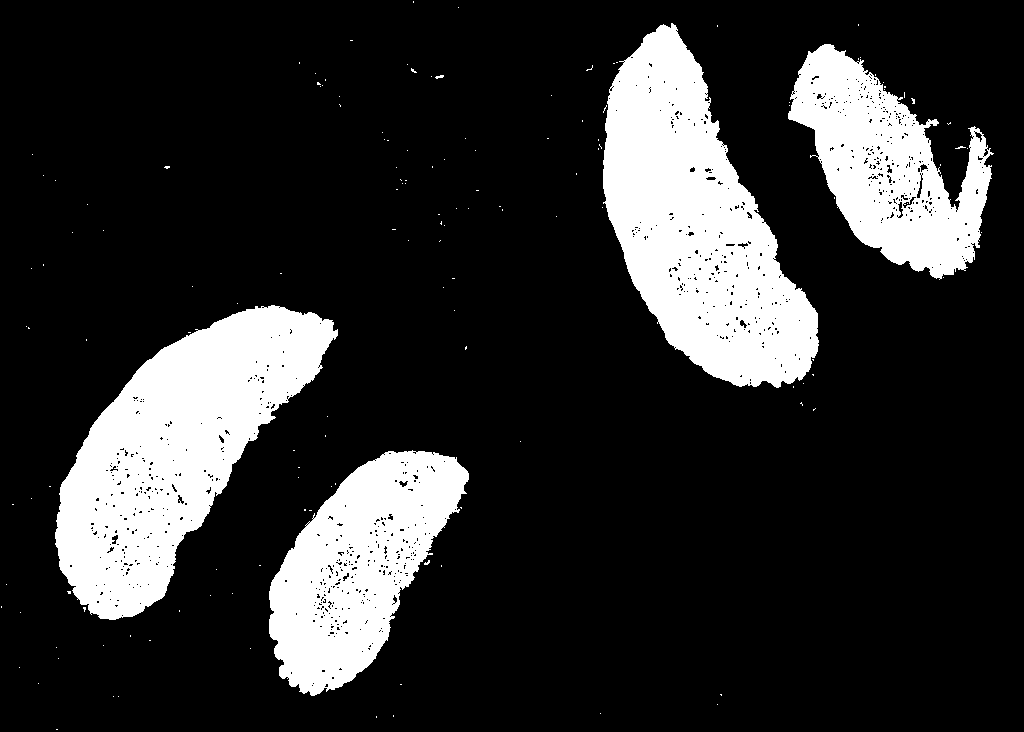

In [15]:

grey_thumbnail = np.array(gry_thmb)
thresh = threshold_otsu(grey_thumbnail)
mask = np.array(grey_thumbnail) < thresh
mask = np.uint8(mask) * 255
display(PIL.Image.fromarray(mask, mode='L'))

In [16]:
"""         https://scikit-image.org/docs/dev/auto_examples                 
            Segmentation section: plot_rag_merge.ipynb
"""
from skimage import io, segmentation, color
from skimage.future import graph
import numpy as np

def _weight_mean_color(graph, src, dst, n):
    """                Callback to handle merging nodes by recomputing mean color.
                       Expects that the mean color of `dst` is already computed.
    Parameters:
        graph : RAG
            The graph under consideration.
        src, dst : int
            The vertices in `graph` to be merged.
        n : int
            A neighbor of `src` or `dst` or both.

    Returns:
        data : dict
            A dictionary with the `"weight"` attribute set as the absolute
            difference of the mean color between node `dst` and `n`.
    """
    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """                Callback: before merging 2 nodes of a mean color distance graph.
                       This method computes the mean color of `dst`.
    Parameters:
        graph : RAG
            The graph under consideration.
        src, dst : int
            The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])

def show_segmented_image(img):
    """ Usage: show_segmented_image(img)
    Args:
        img: PIL image
    """
    labels = segmentation.slic(img, compactness=30, n_segments=400)
    g = graph.rag_mean_color(img, labels)

    labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                       in_place_merge=True,
                                       merge_func=merge_mean_color,
                                       weight_func=_weight_mean_color)

    out = color.label2rgb(labels2, img, kind='avg')
    out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
    
    return out
    

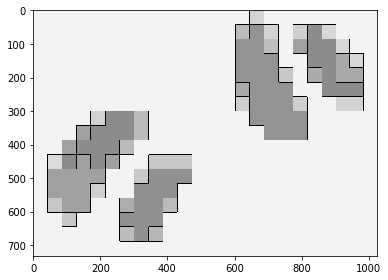

conversion time: 7.718 	Image size: (732, 1024, 3)


In [17]:
start_time = time.time()
out = show_segmented_image(np.array(gry_thmb))
skimage.io.imshow(out)
skimage.io.show()
print('conversion time: %0.3f \tImage size:'%(time.time() - start_time), out.shape)

# Basic Use of deepzoom server (viewer)
    * switch to data directory (../data)
    * cloned to ../../openslide-python/examples/deepzoom/
```bash
python3 ../../openslide-python/examples/deepzoom/deepzoom_multiserver.py
# localhost:5000
# ctrl-C to quit
```

[Top](#top)
### view help for Pillow (PIL fork)
<a id="pil_help"></a>

In [18]:
help(thumbnail)

Help on Image in module PIL.Image object:

class Image(builtins.object)
 |  This class represents an image object.  To create
 |  :py:class:`~PIL.Image.Image` objects, use the appropriate factory
 |  functions.  There's hardly ever any reason to call the Image constructor
 |  directly.
 |  
 |  * :py:func:`~PIL.Image.open`
 |  * :py:func:`~PIL.Image.new`
 |  * :py:func:`~PIL.Image.frombytes`
 |  
 |  Methods defined here:
 |  
 |  __copy__ = copy(self)
 |  
 |  __del__(self)
 |  
 |  __enter__(self)
 |      # Context manager support
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __exit__(self, *args)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __ne__(self, other)
 |      Return self!=value.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __setstate__(self, state)
 |  
 |  alpha_composite(self, im, dest=(0, 0), source=(0, 0))
 |      'In-place' analog of Image.alpha_com